In [23]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
from scipy import linalg

<IPython.core.display.Javascript object>


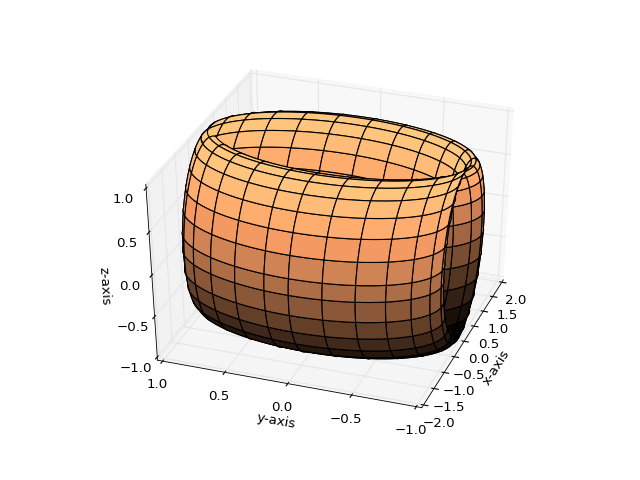

In [16]:

from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ellipsoid
t = np.linspace(-np.pi,np.pi,100)
ones = np.ones(100)
k = np.linspace(-np.pi,np.pi,100)
x = np.outer(np.cos(t),ones) + np.outer(ones,np.cos(k))
y = np.outer(ones,np.sin(k))
z = np.outer(np.sin(t),ones)


# Sphere
#u = np.linspace(0, 2 * np.pi, 100)
#v = np.linspace(0, np.pi, 100)
#x = 10 * np.outer(np.cos(u), np.sin(v))
#y = 10 * np.outer(np.sin(u), np.sin(v))
#z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z,  rstride=4, cstride=4, cmap = cm.copper)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

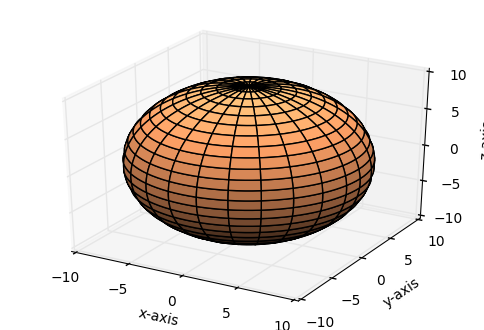

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




# Sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))#
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z,  rstride=4, cstride=4, cmap = cm.copper)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [50]:
N = 20
NT = 5000
dt = 0.01
alpha =  6 * np.pi / NT

psi = np.zeros((NT,N*2), dtype=np.complex)
psi[0, 10] = np.cos(np.pi/8)
psi[0, 11] = np.sin(np.pi/8)


for t in range(1,NT):
    t1 = 1.0
    t2 = np.sin(alpha * t)
    e1 = np.cos(alpha * t)
    e2 = -e1
    T = np.array([[0,t2],
                  [0,0]])
    E = np.array([[e1,t1],
                  [t1, e2]])

    column = np.zeros(N)
    column[1] = 1
    offdiag = np.kron(linalg.circulant(column), T)
    H = offdiag + np.kron(np.eye(N), E) + np.conj(np.transpose(offdiag))
    psi[t,:] = (np.eye(2*N) + 1.j * dt * H) @ psi[t-1,:]

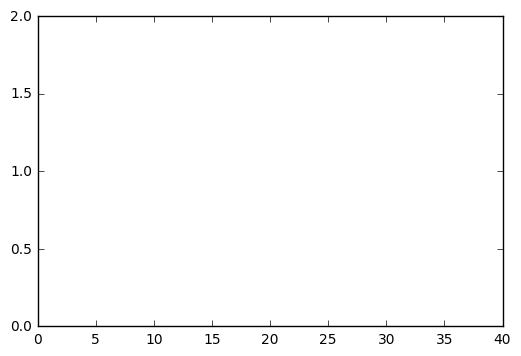

In [43]:
from matplotlib import animation, rc
from IPython.display import HTML
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2*N))
ax.set_ylim((0, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

rc('animation', html='html5')

In [52]:
# animation function. This is called sequentially
def animate(i):
    x = np.arange(2*N)
    y = np.abs(psi[i,:])
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)

In [49]:
HTML(anim.to_html5_video())

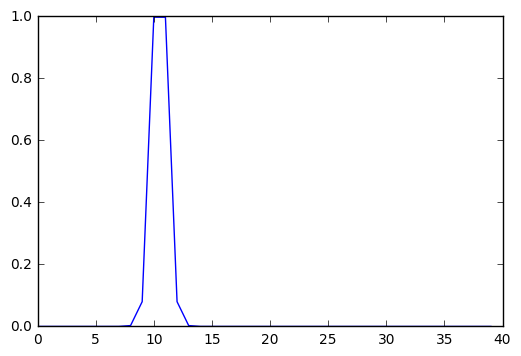

In [53]:
HTML(anim.to_html5_video())